# 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn import set_config
set_config(transform_output = "pandas")

In [3]:
DATA_PATH = "data/"
data = pd.read_csv(DATA_PATH + 'label_encoded.csv', sep=';')
data.head()

,cle,Respondent_ID,weight,A11,A12,A13,A14,A4,A5,A5bis,...,RS193,RS102RECAP,rs11recap2,RS11recap,RS193bis,RS2Recap,RS56Recap,RS2,RS11,RS102
0,1,MET20_999999996,2.501255,1,0,0,0,1,2.0,NaN,...,2,4,1,2,NaN,1,1,24,0,4
1,2,MET20_98888888,0.722914,1,0,0,0,1,5.0,NaN,...,2,1,1,2,NaN,4,1,50,0,1
2,3,MET20_1978307,1.039611,1,0,0,0,1,2.0,NaN,...,2,3,2,1,NaN,3,2,37,1,3
3,4,MET20_1302078,0.976590,1,1,1,0,1,1.0,NaN,...,2,2,1,2,NaN,5,3,63,0,2
4,5,MET20_1869308,0.812315,0,1,0,0,2,NaN,1.0,...,2,3,2,1,NaN,3,1,44,1,3


In [175]:
to_drop = ["Respondent_ID", "weight"]

usages = to_drop + ["A11", "A12", "A13", "A14", "A4", "A5", "A5bis", "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice", "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice", "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", "C1_8_slice", "C1_9_slice"]

attitudes = to_drop + ["A9_1_slice", "A9_2_slice", "A9_3_slice", "A9_4_slice", "A9_5_slice", "A9_6_slice", "A9_7_slice", "A9_8_slice", "A9_9_slice", "A9_10_slice", "A9_11_slice", "A9_12_slice", "A9_13_slice", "A9_14_slice", "A9_15_slice", "A9_16_slice", "A10_1_slice", "A10_2_slice", "A10_3_slice", "A10_4_slice", "A10_5_slice", "A10_6_slice", "A10_7_slice", "A10_8_slice", "A11_1_slice", "A11_2_slice", "A11_3_slice", "A11_4_slice", "A11_5_slice", "A11_6_slice", "A11_7_slice", "A11_8_slice", "A11_9_slice", "A11_10_slice", "A11_11_slice", "A11_12_slice", "A11_13_slice"]

socio_demographical = ["rs3", "rs5", "rs6", "RS1", "RS191", "RS192", "RS193", "RS102RECAP", "rs11recap2", "RS11recap", "RS193bis", "RS2Recap", "RS56Recap", "RS2", "RS11", "RS102"]

data_usages = data[usages].copy()
data_attitudes = data[attitudes].copy()
data_socio_demographical = data[socio_demographical].copy()

In [5]:
respondents_usages = data_usages["Respondent_ID"]
weights_usages = data_usages["weight"]
data_usages = data_usages.drop(to_drop, axis=1)

respondents_attitudes = data_attitudes["Respondent_ID"]
weights_attitudes = data_attitudes["weight"]
data_attitudes = data_attitudes.drop(to_drop, axis=1)

In [177]:
def preprocess_data(input_data, columns, to_drop):
    data = input_data[columns].copy()
    respondents = data["Respondent_ID"]
    weights = data["weight"]
    data = data.drop(to_drop, axis=1)

    ohe = OneHotEncoder(sparse_output=False)
    data_enc = ohe.fit_transform(data)
    data_weighted = data_enc.multiply(weights, axis="index")
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_weighted)
    return data_scaled, respondents

In [180]:
data_attitude_processed, respondents_attitude = preprocess_data(data, attitudes, to_drop)
data_usage_processed, respondents_usage = preprocess_data(data, usages, to_drop)
data_usage_socio_processed, respondents_usage_socio = preprocess_data(data, usages + socio_demographical, to_drop)
data_attitude_socio_processed, respondents_attitude_socio = preprocess_data(data, attitudes + socio_demographical, to_drop)

## Attitude

In [66]:
enc = OneHotEncoder(sparse_output=False)
data_attitude_enc = enc.fit_transform(data_attitudes)
data_attitude_enc.head()

,A9_1_slice_1,A9_1_slice_2,A9_1_slice_3,A9_1_slice_4,A9_2_slice_1,A9_2_slice_2,A9_2_slice_3,A9_2_slice_4,A9_3_slice_1,A9_3_slice_2,...,A11_11_slice_3,A11_11_slice_4,A11_12_slice_1,A11_12_slice_2,A11_12_slice_3,A11_12_slice_4,A11_13_slice_1,A11_13_slice_2,A11_13_slice_3,A11_13_slice_4
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [67]:
data_attitude_weighted = data_attitude_enc.multiply(weights_attitudes, axis="index")

# normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_attitude_weighted_scaled = scaler.fit_transform(data_attitude_weighted)
data_attitude_weighted_scaled

,A9_1_slice_1,A9_1_slice_2,A9_1_slice_3,A9_1_slice_4,A9_2_slice_1,A9_2_slice_2,A9_2_slice_3,A9_2_slice_4,A9_3_slice_1,A9_3_slice_2,...,A11_11_slice_3,A11_11_slice_4,A11_12_slice_1,A11_12_slice_2,A11_12_slice_3,A11_12_slice_4,A11_13_slice_1,A11_13_slice_2,A11_13_slice_3,A11_13_slice_4
0,-0.384623,3.624606,-0.492807,-0.233797,-0.249924,4.272402,-0.746749,-0.405553,-0.279733,4.143467,...,-0.512096,-0.248199,-0.537852,3.505534,-0.384446,-0.186162,-0.490858,3.703228,-0.448131,-0.281435
1,1.368312,-0.925125,-0.492807,-0.233797,2.226789,-0.616957,-0.746749,-0.405553,2.290044,-0.646693,...,-0.512096,-0.248199,-0.537852,0.373814,-0.384446,-0.186162,-0.490858,0.491159,-0.448131,-0.281435
2,-0.384623,-0.925125,1.775788,-0.233797,-0.249924,1.415236,-0.746749,-0.405553,-0.279733,1.344270,...,-0.512096,-0.248199,-0.537852,0.931529,-0.384446,-0.186162,-0.490858,1.063183,-0.448131,-0.281435
3,1.983431,-0.925125,-0.492807,-0.233797,-0.249924,1.292045,-0.746749,-0.405553,-0.279733,1.223578,...,-0.512096,-0.248199,1.500122,-0.899263,-0.384446,-0.186162,-0.490858,0.949353,-0.448131,-0.281435
4,-0.384623,0.552458,-0.492807,-0.233797,-0.249924,0.970925,-0.746749,-0.405553,-0.279733,0.908973,...,-0.512096,-0.248199,-0.537852,0.531251,-0.384446,-0.186162,-0.490858,0.652636,-0.448131,-0.281435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.384623,-0.925125,1.484221,-0.233797,-0.249924,1.154053,-0.746749,-0.405553,-0.279733,-0.646693,...,-0.512096,-0.248199,1.352807,-0.899263,-0.384446,-0.186162,1.505648,-0.814581,-0.448131,-0.281435
4996,-0.384623,1.362940,-0.492807,-0.233797,-0.249924,-0.616957,1.579404,-0.405553,-0.279733,-0.646693,...,2.009926,-0.248199,-0.537852,1.315915,-0.384446,-0.186162,-0.490858,-0.814581,-0.448131,3.865637
4997,-0.384623,-0.925125,1.895990,-0.233797,-0.249924,-0.616957,-0.746749,2.116775,-0.279733,-0.646693,...,1.682737,-0.248199,-0.537852,1.028533,-0.384446,-0.186162,-0.490858,-0.814581,1.895849,-0.281435
4998,-0.384623,-0.925125,3.919563,-0.233797,-0.249924,-0.616957,2.992494,-0.405553,-0.279733,-0.646693,...,-0.512096,-0.248199,3.681759,-0.899263,-0.384446,-0.186162,-0.490858,-0.814581,3.881458,-0.281435


In [8]:
pca = PCA(n_components=3)
pca.fit(data_attitude_weighted_scaled)
data_attitude_pca = pca.transform(data_attitude_weighted_scaled)

In [9]:
data_attitude_pca

,pca0,pca1,pca2
0,0.972615,-14.320898,12.333245
1,-4.431524,2.428300,-0.962182
2,0.590770,-4.700064,0.860621
3,-0.929671,-1.627930,-0.196459
4,-0.030558,-3.359246,-0.202608
...,...,...,...
4995,-4.811472,2.957268,0.165684
4996,1.549513,-2.469336,1.172951
4997,5.235751,-0.159217,-0.360008
4998,6.905725,-5.011459,5.505052


/var/folders/d4/5g8l86tn7gnbb_cwzfq_vd180000gn/T/ipykernel_86736/3378543005.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(data_attitude_pca.iloc[:, 0], data_attitude_pca.iloc[:, 1], data_attitude_pca.iloc[:, 2], cmap='plasma')


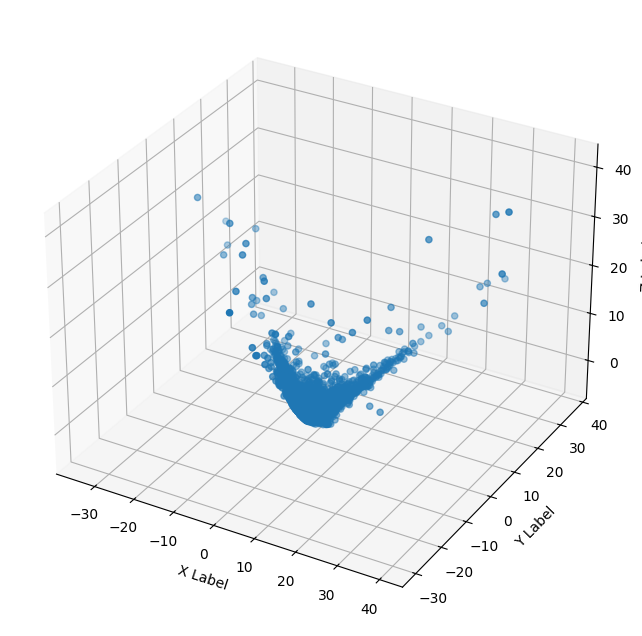

In [10]:
# Plotting in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_attitude_pca.iloc[:, 0], data_attitude_pca.iloc[:, 1], data_attitude_pca.iloc[:, 2], cmap='plasma')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### Elbow method

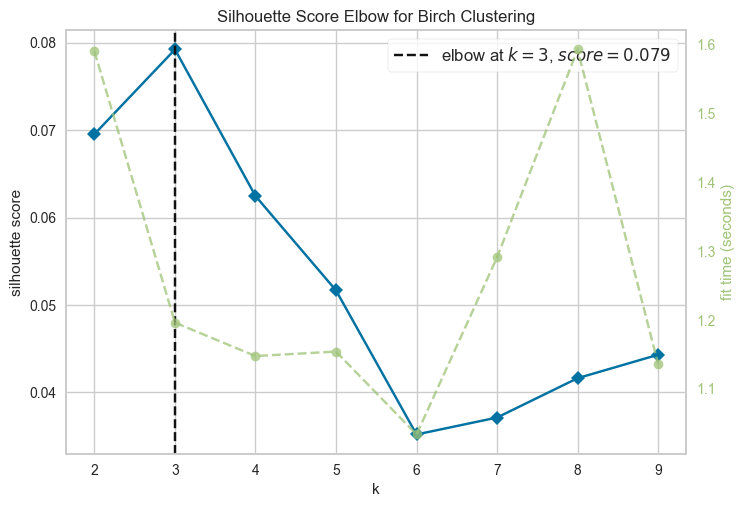

<Axes: title={'center': 'Silhouette Score Elbow for Birch Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import Birch, KMeans, DBSCAN

model = Birch(branching_factor=100, threshold=.5, n_clusters=None)
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(data_attitude_weighted_scaled)        # Fit the data to the visualizer
visualizer.show()

### Clustering

#### BIRCH

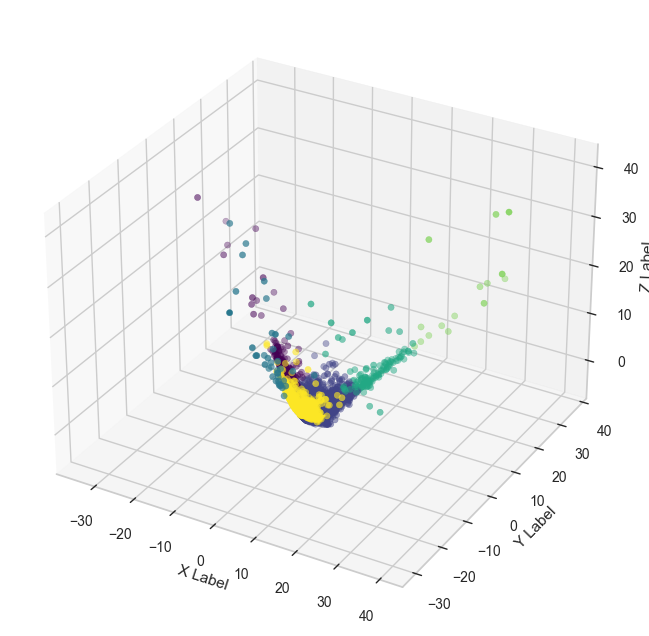

In [12]:
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

# BIRCH clustering
brc = Birch(branching_factor=100, threshold=.5, n_clusters=6)
brc.fit(data_attitude_pca)

# Plotting
labels = brc.predict(data_attitude_pca)
# Plotting in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_attitude_pca.iloc[:, 0], data_attitude_pca.iloc[:, 1], data_attitude_pca.iloc[:, 2], cmap='viridis', c=labels)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [13]:
# use plotly to plot in 3D
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=data_attitude_pca.iloc[:, 0],
    y=data_attitude_pca.iloc[:, 1],
    z=data_attitude_pca.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=labels,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [14]:
from sklearn.metrics import silhouette_score

# Silhouette Coefficient
silhouette = silhouette_score(data_attitude_pca, labels)
print(f'Silhouette Coefficient: {silhouette}')

Silhouette Coefficient: 0.21333184877911646


Silhouette Coefficient: Measures how similar an object is to its own cluster compared to other clusters. Values range from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

Calinski-Harabasz Index: Also known as the Variance Ratio Criterion, this metric evaluates the cluster compactness and separation, where a higher score denotes a model with better defined clusters.

Davies-Bouldin Index: This index is defined as the average similarity measure of each cluster with its most similar cluster. Clusters which are farther apart and less dispersed will result in a lower score, which is desirable.

Dunn Index: It identifies clusters that are well-separated and compact. A higher Dunn index indicates better clustering.

#### HBDSCAN

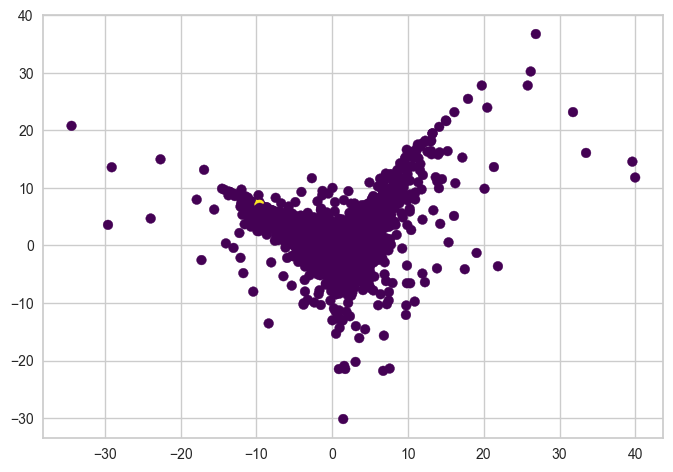

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

brc = DBSCAN()
brc.fit(data_attitude_weighted_scaled)

# Plotting
labels = brc.labels_
# Plotting in 3D
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_attitude_pca.iloc[:, 0], data_attitude_pca.iloc[:, 1], data_attitude_pca.iloc[:, 2], cmap='viridis', c=labels)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

plt.scatter(data_attitude_pca.iloc[:,0], data_attitude_pca.iloc[:,1], c=labels, cmap='viridis')
plt.show()

In [16]:
# Silhouette Coefficient
silhouette = silhouette_score(data_attitude_weighted_scaled, labels)
print(f'Silhouette Coefficient: {silhouette}')

Silhouette Coefficient: -0.24981844537936157


### Agglomerative Clustering

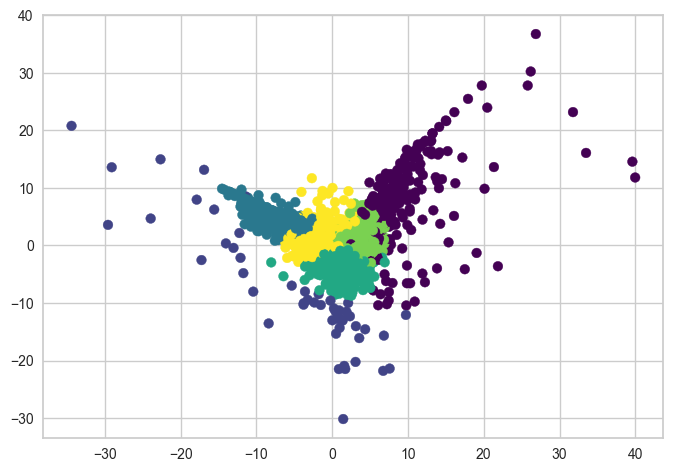

In [17]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# BIRCH clustering
brc = AgglomerativeClustering(n_clusters=6)
brc.fit(data_attitude_pca)

# Plotting
labels = brc.labels_
# Plotting in 3D
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_attitude_pca.iloc[:, 0], data_attitude_pca.iloc[:, 1], data_attitude_pca.iloc[:, 2], cmap='viridis', c=labels)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

plt.scatter(data_attitude_pca.iloc[:,0], data_attitude_pca.iloc[:,1], c=labels, cmap='viridis')
plt.show()

In [18]:
# use plotly to plot in 3D
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=data_attitude_pca.iloc[:, 0],
    y=data_attitude_pca.iloc[:, 1],
    z=data_attitude_pca.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=labels,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [19]:
# Silhouette Coefficient
silhouette = silhouette_score(data_attitude_pca, labels)
print(f'Silhouette Coefficient: {silhouette}')

Silhouette Coefficient: 0.27699681844957036


### KMeans

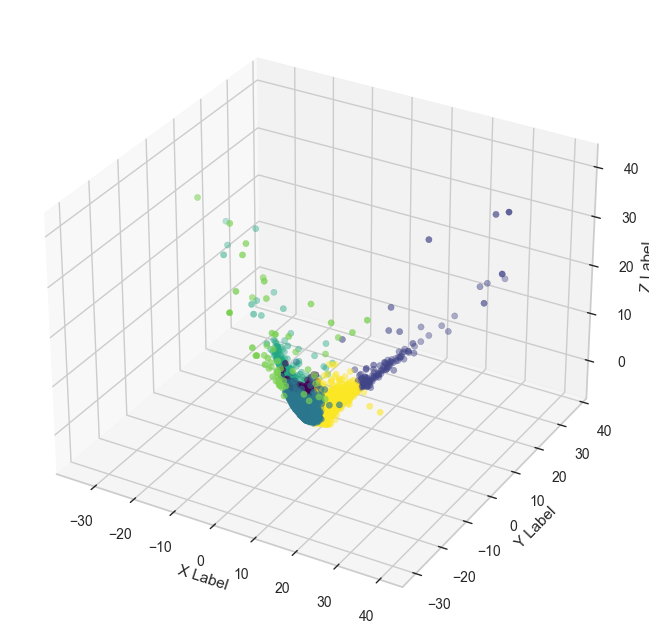

In [20]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_attitude_pca)
labels = kmeans.labels_

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_attitude_pca.iloc[:, 0], data_attitude_pca.iloc[:, 1], data_attitude_pca.iloc[:, 2], cmap='viridis', c=labels)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [21]:
# use plotly to plot in 3D
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=data_attitude_pca.iloc[:, 0],
    y=data_attitude_pca.iloc[:, 1],
    z=data_attitude_pca.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color=labels,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [22]:
# Silhouette Coefficient
silhouette = silhouette_score(data_attitude_pca, labels)
print(f'Silhouette Coefficient: {silhouette}')

Silhouette Coefficient: 0.33804189433105447


### Usages

In [165]:
encUsage = OneHotEncoder(sparse_output=False)
data_usage_enc = encUsage.fit_transform(data_usages)
data_usage_enc.head()

,A11_0,A11_1,A12_0,A12_1,A13_0,A13_1,A14_0,A4_1,A4_2,A4_3,...,C1_8_slice_1,C1_8_slice_2,C1_8_slice_3,C1_8_slice_4,C1_8_slice_5,C1_9_slice_1,C1_9_slice_2,C1_9_slice_3,C1_9_slice_4,C1_9_slice_5
0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [166]:
# multiply each row by its weight
data_usage_weighted = data_usage_enc.multiply(weights_usages, axis="index")

scaler = StandardScaler()
data_usage_weighted_scaled = scaler.fit_transform(data_usage_weighted)
data_usage_weighted_scaled

,A11_0,A11_1,A12_0,A12_1,A13_0,A13_1,A14_0,A4_1,A4_2,A4_3,...,C1_8_slice_1,C1_8_slice_2,C1_8_slice_3,C1_8_slice_4,C1_8_slice_5,C1_9_slice_1,C1_9_slice_2,C1_9_slice_3,C1_9_slice_4,C1_9_slice_5
0,-0.462221,3.213185,3.204202,-0.470179,3.182003,-0.734129,3.527030,3.233756,-0.372937,-0.356970,...,-0.075454,12.236583,-0.283974,-0.682641,-0.837079,-0.079713,12.174559,-0.285269,-0.616565,-0.895611
1,-0.462221,-0.055175,-0.046610,-0.470179,0.231262,-0.734129,-0.564818,0.066495,-0.372937,-0.356970,...,-0.075454,-0.160271,-0.283974,0.715060,-0.837079,-0.079713,-0.177925,-0.285269,0.806137,-0.895611
2,-0.462221,0.526874,0.532314,-0.470179,0.756747,-0.734129,0.163883,0.630540,-0.372937,-0.356970,...,-0.075454,-0.160271,-0.283974,1.327371,-0.837079,-0.079713,-0.177925,-0.285269,1.429401,-0.895611
3,-0.462221,0.411049,-1.368099,1.617200,-0.968245,1.128792,0.018875,0.518297,-0.372937,-0.356970,...,-0.075454,-0.160271,-0.283974,1.205524,-0.837079,-0.079713,-0.177925,-0.285269,1.305374,-0.895611
4,1.280480,-1.383797,-1.368099,1.266075,0.379601,-0.734129,-0.359113,-1.221029,1.577412,-0.356970,...,-0.075454,-0.160271,-0.283974,0.887909,-0.837079,-0.079713,-0.177925,-0.285269,0.982078,-0.895611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.462221,0.281309,0.288067,-0.470179,-0.968245,0.994131,-0.143555,-1.221029,-0.372937,2.179983,...,-0.075454,-0.160271,-0.283974,1.069038,-0.837079,-0.079713,-0.177925,-0.285269,-0.616565,0.652947
4996,2.236384,-1.383797,-1.368099,2.218443,1.118920,-0.734129,0.666114,-1.221029,2.647215,-0.356970,...,-0.075454,-0.160271,-0.283974,-0.682641,1.290844,-0.079713,-0.177925,-0.285269,-0.616565,1.254403
4997,1.886286,-1.383797,-1.368099,1.869640,0.848146,-0.734129,0.290627,-1.221029,2.255402,-0.356970,...,-0.075454,-0.160271,-0.283974,-0.682641,1.014783,-0.079713,-0.177925,-0.285269,-0.616565,0.975475
4998,3.875730,-1.383797,2.328164,-0.470179,-0.968245,3.123036,2.424348,-1.221029,-0.372937,5.305053,...,-0.075454,-0.160271,-0.283974,-0.682641,2.583513,-0.079713,-0.177925,-0.285269,-0.616565,2.560492


In [167]:
pca = PCA(n_components=3)
pca.fit(data_usage_weighted_scaled)
data_usage_pca = pca.transform(data_usage_weighted_scaled)

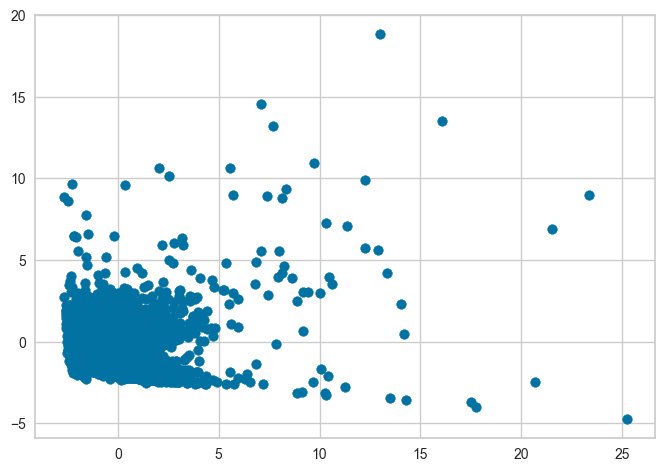

In [128]:
# # Plotting in 3D
# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_usage_pca.iloc[:, 0], data_usage_pca.iloc[:, 1], data_usage_pca.iloc[:, 2], cmap='plasma')
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

# plot in 2D
plt.scatter(data_usage_pca.iloc[:,0], data_usage_pca.iloc[:,1])
plt.show()

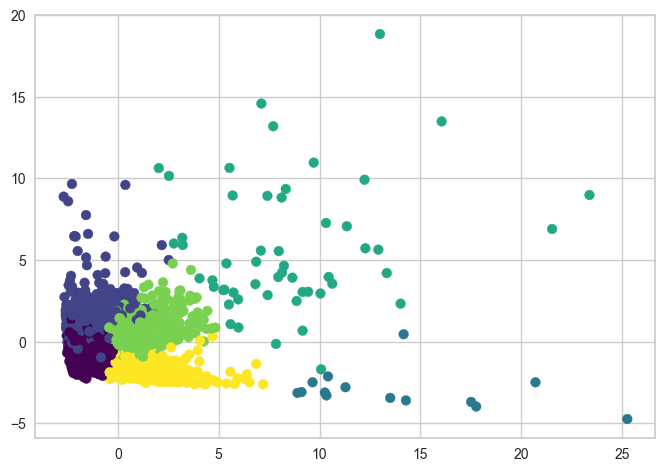

In [129]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(data_usage_weighted_scaled)
labels = kmeans.labels_

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(data_usage_pca.iloc[:, 0], data_usage_pca.iloc[:, 1], data_usage_pca.iloc[:, 2], cmap='viridis', c=labels)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

# plot in 2D
plt.scatter(data_usage_pca.iloc[:,0], data_usage_pca.iloc[:,1], c=labels, cmap='viridis')
plt.show()

In [130]:
# Silhouette Coefficient
silhouette = silhouette_score(data_usage_weighted_scaled, labels)
print(f'Silhouette Coefficient: {silhouette}')

Silhouette Coefficient: 0.06899382017435648


# 2

Classifier (labels = clusters) et prendre feature importance = golden questions. -> XGBoost

In [171]:
data_attitude_weighted_scaled

,A9_1_slice_1,A9_1_slice_2,A9_1_slice_3,A9_1_slice_4,A9_2_slice_1,A9_2_slice_2,A9_2_slice_3,A9_2_slice_4,A9_3_slice_1,A9_3_slice_2,...,A11_11_slice_3,A11_11_slice_4,A11_12_slice_1,A11_12_slice_2,A11_12_slice_3,A11_12_slice_4,A11_13_slice_1,A11_13_slice_2,A11_13_slice_3,A11_13_slice_4
0,-0.384623,3.624606,-0.492807,-0.233797,-0.249924,4.272402,-0.746749,-0.405553,-0.279733,4.143467,...,-0.512096,-0.248199,-0.537852,3.505534,-0.384446,-0.186162,-0.490858,3.703228,-0.448131,-0.281435
1,1.368312,-0.925125,-0.492807,-0.233797,2.226789,-0.616957,-0.746749,-0.405553,2.290044,-0.646693,...,-0.512096,-0.248199,-0.537852,0.373814,-0.384446,-0.186162,-0.490858,0.491159,-0.448131,-0.281435
2,-0.384623,-0.925125,1.775788,-0.233797,-0.249924,1.415236,-0.746749,-0.405553,-0.279733,1.344270,...,-0.512096,-0.248199,-0.537852,0.931529,-0.384446,-0.186162,-0.490858,1.063183,-0.448131,-0.281435
3,1.983431,-0.925125,-0.492807,-0.233797,-0.249924,1.292045,-0.746749,-0.405553,-0.279733,1.223578,...,-0.512096,-0.248199,1.500122,-0.899263,-0.384446,-0.186162,-0.490858,0.949353,-0.448131,-0.281435
4,-0.384623,0.552458,-0.492807,-0.233797,-0.249924,0.970925,-0.746749,-0.405553,-0.279733,0.908973,...,-0.512096,-0.248199,-0.537852,0.531251,-0.384446,-0.186162,-0.490858,0.652636,-0.448131,-0.281435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.384623,-0.925125,1.484221,-0.233797,-0.249924,1.154053,-0.746749,-0.405553,-0.279733,-0.646693,...,-0.512096,-0.248199,1.352807,-0.899263,-0.384446,-0.186162,1.505648,-0.814581,-0.448131,-0.281435
4996,-0.384623,1.362940,-0.492807,-0.233797,-0.249924,-0.616957,1.579404,-0.405553,-0.279733,-0.646693,...,2.009926,-0.248199,-0.537852,1.315915,-0.384446,-0.186162,-0.490858,-0.814581,-0.448131,3.865637
4997,-0.384623,-0.925125,1.895990,-0.233797,-0.249924,-0.616957,-0.746749,2.116775,-0.279733,-0.646693,...,1.682737,-0.248199,-0.537852,1.028533,-0.384446,-0.186162,-0.490858,-0.814581,1.895849,-0.281435
4998,-0.384623,-0.925125,3.919563,-0.233797,-0.249924,-0.616957,2.992494,-0.405553,-0.279733,-0.646693,...,-0.512096,-0.248199,3.681759,-0.899263,-0.384446,-0.186162,-0.490858,-0.814581,3.881458,-0.281435


In [141]:
# XGBoost classifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

seed = 42

# model = XGBClassifier(enable_categorical=True, random_state=seed, tree_method='hist', max_depth=5, n_estimators=50, learning_rate=0.1)
model = XGBClassifier(random_state=seed, enable_categorical=False)
scores = cross_val_score(model, data_attitude_weighted_scaled, labels, cv=5, n_jobs=-1)
scores

array([0.923, 0.915, 0.9  , 0.92 , 0.915])

In [142]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.02)


In [143]:
X_train, X_test, y_train, y_test = train_test_split(data_attitude_weighted_scaled, labels, test_size=0.2, random_state=seed)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, predictions))

Accuracy: 92.00%
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       253
           1       1.00      0.75      0.86        28
           2       0.95      0.94      0.94       462
           3       0.97      0.86      0.92        88
           4       0.75      1.00      0.86        12
           5       0.90      0.92      0.91       157

    accuracy                           0.92      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.92      0.92      0.92      1000



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

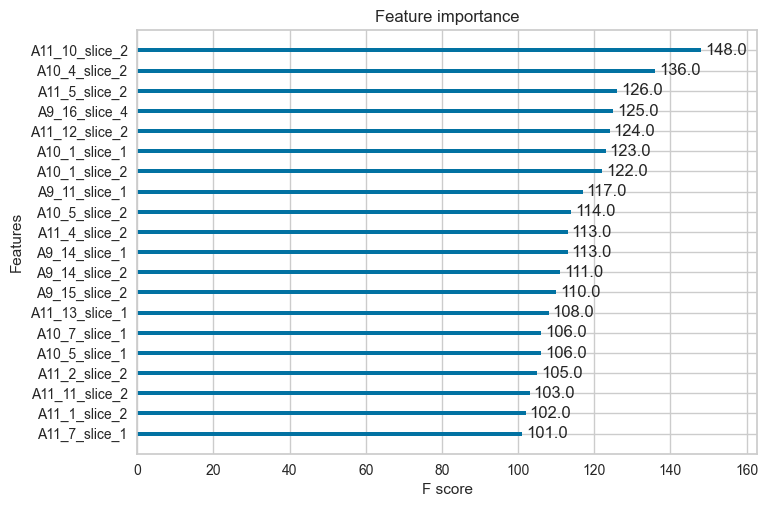

In [144]:
# get feature importance
from xgboost import plot_importance

plot_importance(model, max_num_features=20, importance_type='weight')

In [145]:
importance = model.get_booster().get_score(importance_type="weight")
# sort by value
sorted_importance = sorted(importance.items(), key=lambda kv: kv[1], reverse=True)
sorted_importance = np.array(sorted_importance)

In [146]:
question_importance = np.vectorize(lambda x: "_".join(x.split("_")[:-1]))(sorted_importance[:, 0])
question_importance, ind = np.unique(question_importance, return_index=True)
question_importance = question_importance[np.argsort(ind)]
question_importance

array(['A11_10_slice', 'A10_4_slice', 'A11_5_slice', 'A9_16_slice',
       'A11_12_slice', 'A10_1_slice', 'A9_11_slice', 'A10_5_slice',
       'A9_14_slice', 'A11_4_slice', 'A9_15_slice', 'A11_13_slice',
       'A10_7_slice', 'A11_2_slice', 'A11_11_slice', 'A11_1_slice',
       'A11_7_slice', 'A9_7_slice', 'A10_2_slice', 'A11_6_slice',
       'A9_9_slice', 'A11_8_slice', 'A9_6_slice', 'A9_3_slice',
       'A11_3_slice', 'A9_1_slice', 'A9_12_slice', 'A9_4_slice',
       'A9_2_slice', 'A9_10_slice', 'A9_13_slice', 'A11_9_slice',
       'A9_8_slice', 'A10_6_slice', 'A10_3_slice', 'A10_8_slice',
       'A9_5_slice'], dtype='<U12')

In [153]:
def benchmark_feature_importance(importance, data, labels):
    accuracies = []
    for i in range(1, len(importance)+1):
        features = importance[:i]
        X = data.loc[:, data.columns.str.startswith(tuple(features))]
        model = XGBClassifier(random_state=seed, enable_categorical=False)
        scores = cross_val_score(model, X, labels, cv=5, n_jobs=-1)
        accuracies.append(scores.mean() * 100)
        print(f"Accuracy with {i} features: {scores.mean() * 100}%")
    return accuracies

In [154]:
accuracies_by_feature_count = benchmark_feature_importance(question_importance, data_attitude_weighted_scaled, labels)

Accuracy with 1 features: 59.88%
Accuracy with 2 features: 65.92%
Accuracy with 3 features: 70.12%
Accuracy with 4 features: 72.02%
Accuracy with 5 features: 72.99999999999999%
Accuracy with 6 features: 73.8%
Accuracy with 7 features: 75.33999999999999%
Accuracy with 8 features: 76.88%
Accuracy with 9 features: 79.22%
Accuracy with 10 features: 79.72000000000001%
Accuracy with 11 features: 80.80000000000001%
Accuracy with 12 features: 82.24000000000001%
Accuracy with 13 features: 82.48%
Accuracy with 14 features: 84.11999999999999%
Accuracy with 15 features: 84.97999999999999%
Accuracy with 16 features: 85.01999999999998%
Accuracy with 17 features: 85.6%
Accuracy with 18 features: 86.42%
Accuracy with 19 features: 86.67999999999999%
Accuracy with 20 features: 86.82000000000001%
Accuracy with 21 features: 87.20000000000002%
Accuracy with 22 features: 87.88%
Accuracy with 23 features: 87.7%
Accuracy with 24 features: 89.32%
Accuracy with 25 features: 89.97999999999999%
Accuracy with 26 f

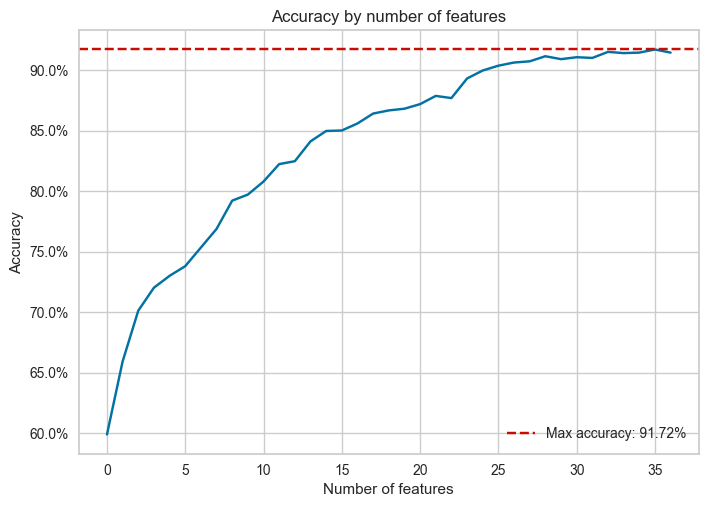

In [164]:
import matplotlib.ticker as mtick

plt.plot(accuracies_by_feature_count)
max_accuracy = max(accuracies_by_feature_count)
plt.axhline(max_accuracy, color='r', linestyle='--', label=f"Max accuracy: {max_accuracy:.2f}%")
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.title("Accuracy by number of features")
plt.legend()
plt.show()

# 3

Classifier avec labels (clusters) orange et features vertes, vice versa. -> XGBoost

In [183]:
# PART 1
## Compute for the green ones -> PCA of 3 + KMeans of 6

# PCA - Attitudes
pca_attitudes = PCA(n_components=3)
pca_attitudes.fit(data_attitude_socio_processed)
data_attitude_pca = pca_attitudes.transform(data_attitude_socio_processed)

# PCA - Usage
pca_usage = PCA(n_components=3)
pca_usage.fit(data_usage_socio_processed)
data_usage_pca = pca_usage.transform(data_usage_socio_processed)

# KMeans - Attitudes
kmeans_attitudes = KMeans(n_clusters=6, random_state=0).fit(data_attitude_pca)
labels_attitudes = kmeans_attitudes.labels_

# KMeans - Usage
kmeans_usage = KMeans(n_clusters=6, random_state=0).fit(data_usage_pca)
labels_usage = kmeans_usage.labels_

In [184]:
# PART 2

## 3 Make a XGbooost that classifies clusters from data_usage_pca into 6 classes based on the labels of data_attitude_pca
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
TEST_SIZE = 0.4

usage_train, usage_test, labels_usage_train, labels_usage_test = train_test_split(data_usage_socio_processed, labels_usage, test_size=TEST_SIZE, random_state=RANDOM_STATE)
attitudes_train, attitudes_test, labels_attitude_train, labels_attitude_test = train_test_split(data_attitude_socio_processed, labels_attitudes, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Accuracy: 0.513


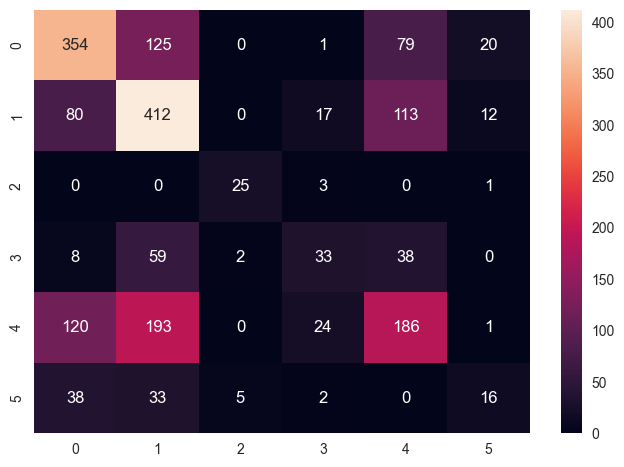

In [186]:
## PART 3

# Usage -> attitudes

from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

# XGBoost
xgb = XGBClassifier()
xgb.fit(usage_train, labels_attitude_train)

# Predict
preds = xgb.predict(usage_test)

# Accuracy
accuracy = accuracy_score(labels_attitude_test, preds)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(labels_attitude_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

Accuracy: 0.839


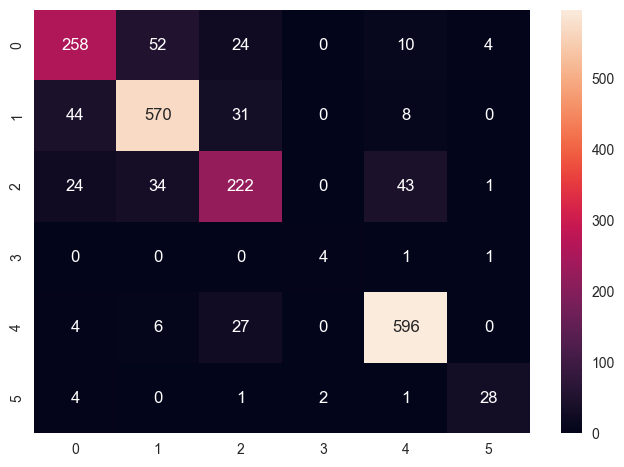

In [187]:
## PART 4

# Attitudes -> usage

# XGBoost
xgb = XGBClassifier()
xgb.fit(attitudes_train, labels_usage_train)

# Predict
preds = xgb.predict(attitudes_test)

# Accuracy
accuracy = accuracy_score(labels_usage_test, preds)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
cm = confusion_matrix(labels_usage_test, preds)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()